###### **<span style="font-family: 'Palatino Linotype', serif;"> Matéria Condensada </span>**

## **<span style="font-family: 'Palatino Linotype', serif;"> Estudo dos Efeitos da Densidade de Vacâncias na Estrutura de Bandas de Materiais Bidimensionais via Modelo Tight-Binding </span>**

##### **<span style="font-family: 'Palatino Linotype', serif;"> Autor:</span>** <span style="font-family: 'Palatino Linotype', serif;"> Caio M. Leão Dantas</span> 
##### **<span style="font-family: 'Palatino Linotype', serif;"> Orientador:</span>** <span style="font-family: 'Palatino Linotype', serif;"> Felipe David Crasto de Lima </span> 

___

## Bibliotecas

In [1]:
from pythtb import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PARÂMETROS ASSOCIADOS À ENERGIA

t = -1.0 

delta=0.0
e0=delta
e1=delta
e2=delta

In [3]:
# VETORES DE REDE 

a=1.0
lat=[
    [a, 0.0],
    [a/2.0, a*np.sqrt(3.0)/2.0]
    ]

In [4]:
# POSIÇÕES DOS ÁTOMOS NA CÉLULA UNITÁRIA 

orb=[ 
    [0.0, 0.0],
    [a/3, 0.0],
    [0.0, a/3]
    ]

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.     ]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[ 0.00000e+00  0.00000e+00]
 [ 6.66667e-01  1.56412e-17]
 [ 5.00000e-01 -2.88675e-01]
 [ 0.00000e+00  0.00000e+00]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [0.5 0. ]
  length = 0.57735  from  [0.5 0. ]  to  [0. 0.]
node distance list: [0.      0.66667 1.      1.57735]
node index list:    [  0  51  76 120]
----- k_path report end ------------

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coor

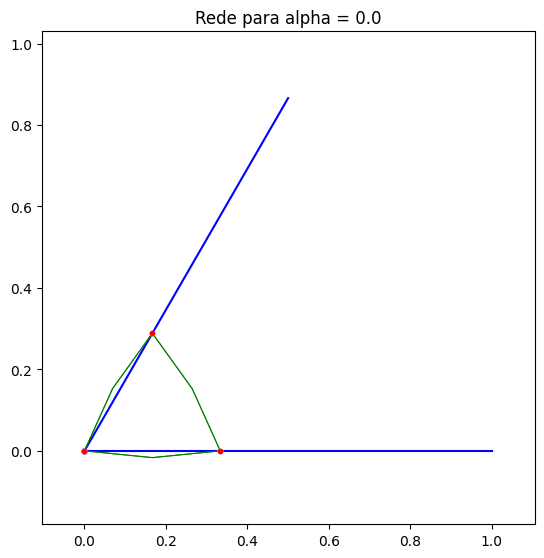

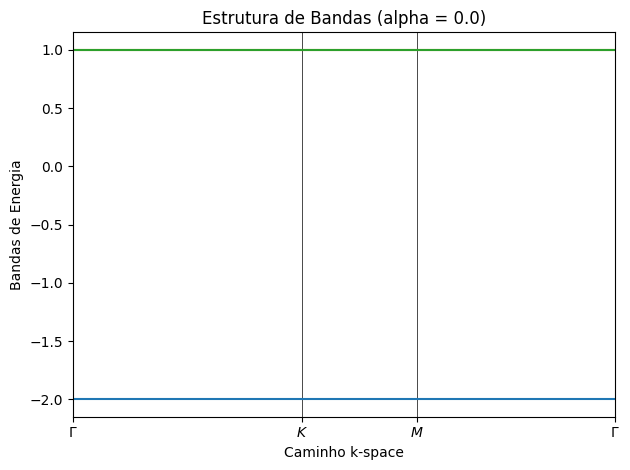

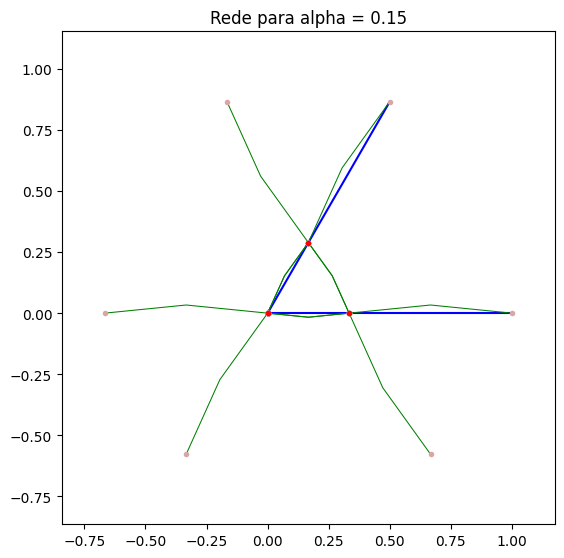

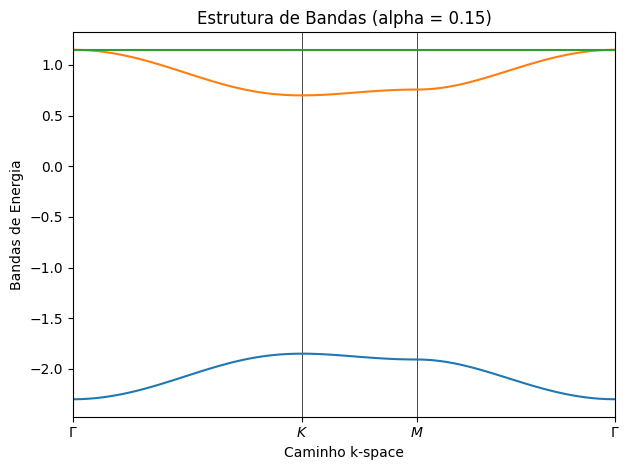

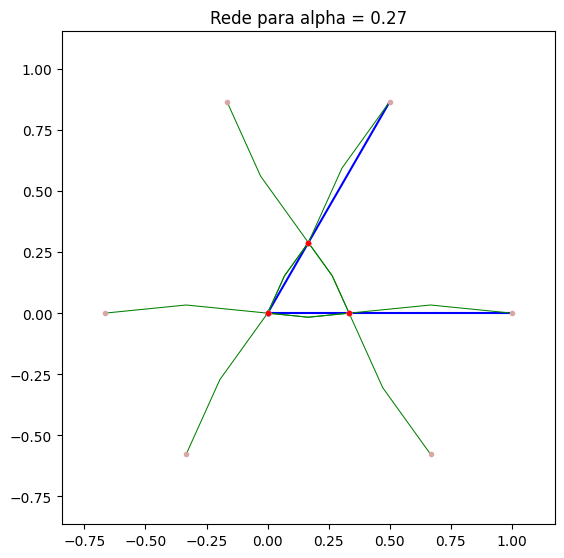

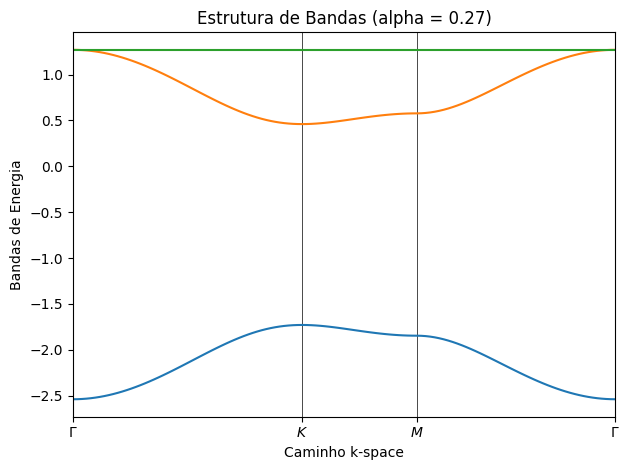

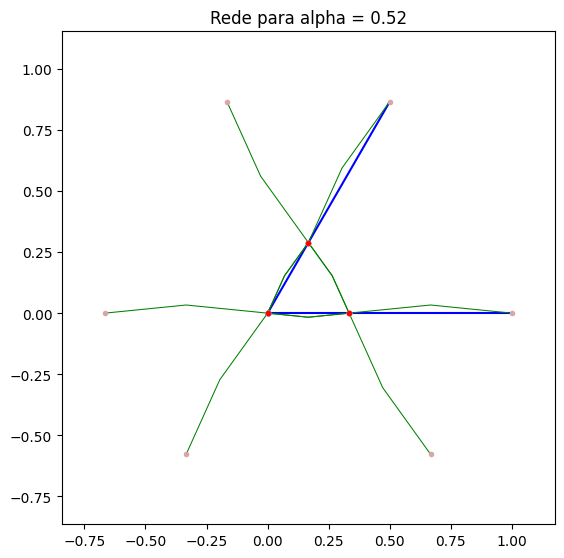

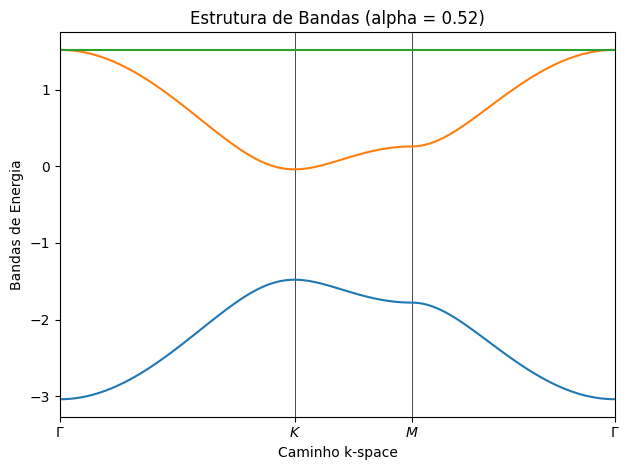

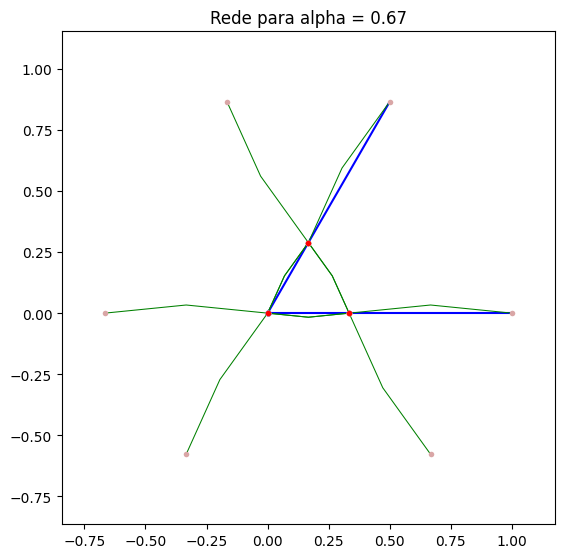

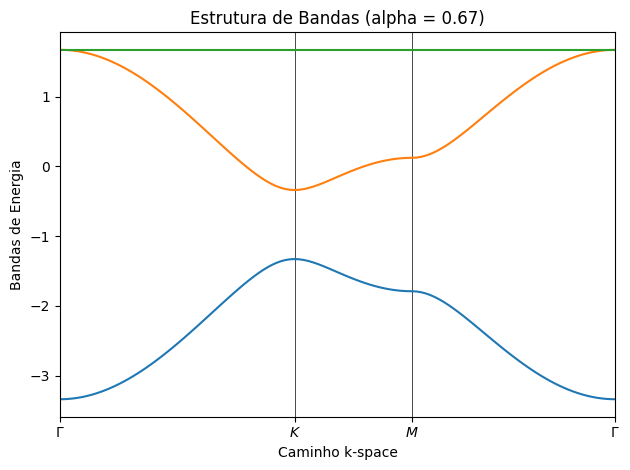

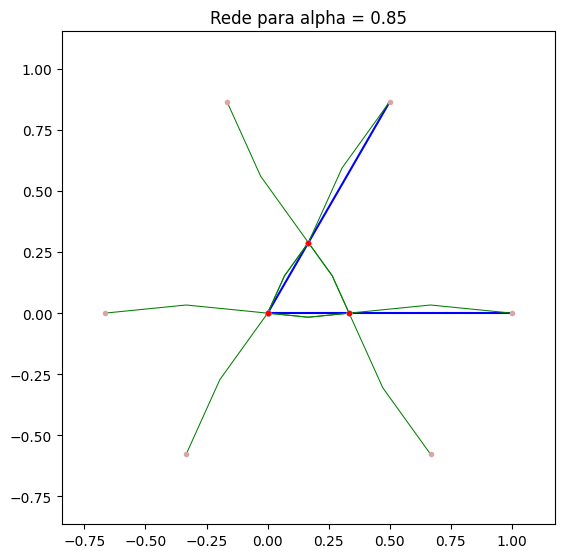

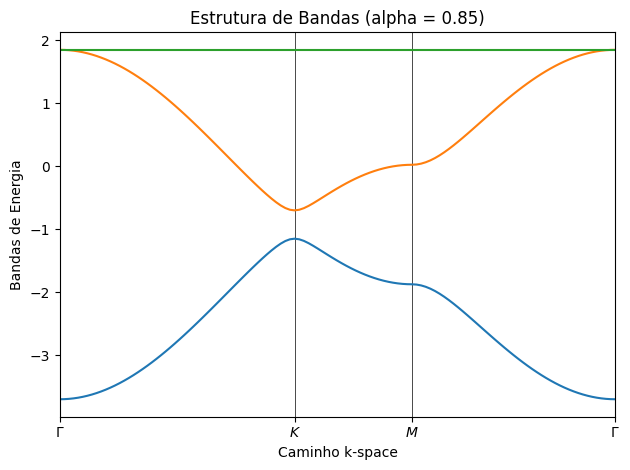

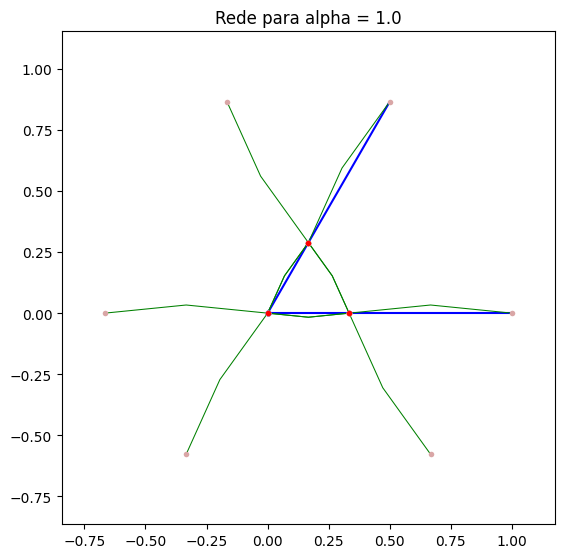

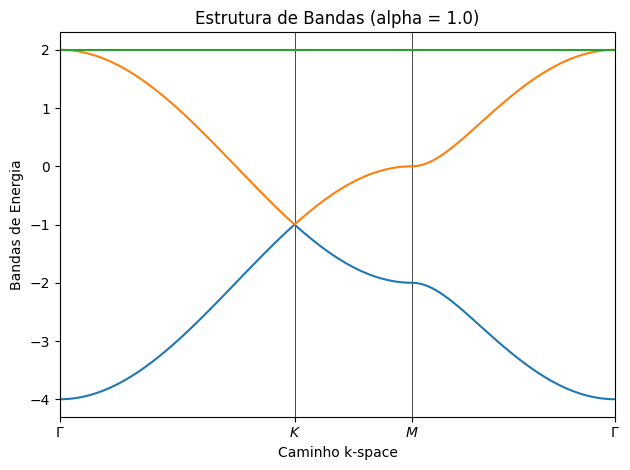

In [5]:
# CRIAÇÃO DO MODELO E CÁLCULO DAS BANDAS DE ENERGIA PARA DIFERENTES VALORES DE ALPHA

alpha_values = [0., .15, .27, .52, .67, .85, 1.]

for alpha in alpha_values:
  u = alpha * t
  my_model=tb_model(2, 2, lat, orb)

  my_model.set_onsite([e0,e1,e2])

  t_in = t

  my_model.set_hop(t_in, 0, 1, [ 0, 0])
  my_model.set_hop(t_in, 1, 2, [ 0, 0])
  my_model.set_hop(t_in, 2, 0, [ 0, 0])

  if alpha != 0.0:
      # my_model.set_hop(u, 0, 1, [-1, 0])
      # my_model.set_hop(u, 1, 2, [ 0, -1])
      # my_model.set_hop(u, 2, 0, [ 1, -1])
    my_model.set_hop(u, 0, 1, [-1, 0])
    my_model.set_hop(u, 0, 2, [0, -1])
    my_model.set_hop(u, 1, 2, [1, -1])

  (fig, ax) = my_model.visualize(0, 1)
  ax.set_title("Rede para alpha = {}".format(alpha))

  # -------------------------------------------------------------------------- 

  path=[[0.,0.],[2./3.,1./3.],[.5, 0.0],[0.,0.]]
  label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
  nk=121

  (k_vec,k_dist,k_node)=my_model.k_path(path,nk)

  evals=my_model.solve_all(k_vec)

  fig, ax = plt.subplots()
  ax.set_xlim(k_node[0],k_node[-1])
  ax.set_xticks(k_node)
  ax.set_xticklabels(label)
  for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')
  ax.set_title(f"Estrutura de Bandas (alpha = {alpha})")
  ax.set_xlabel("Caminho k-space")
  ax.set_ylabel("Bandas de Energia")

  ax.plot(k_dist,evals[0])
  ax.plot(k_dist,evals[1])
  ax.plot(k_dist,evals[2])

  fig.tight_layout()